# Wine Classification Project

## Project Objective


The primary objective of this project is to develop a machine learning model that accurately classifies wines into one of three cultivars based on their chemical properties. The goal is to evaluate and compare different machine learning algorithms to determine the most effective model for this classification task.

## Dataset Overview

The wine dataset used in this project contains 13 variables that describe the chemical properties of 178 wines from three different cultivars. The dataset was originally published by the UCI Machine Learning Repository and is widely used for teaching and research in the field of data science and machine learning.
    The dataset can be downloaded from the following source:
    - [UCI Machine Learning Repository - Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine)

## Project Setup

We start by importing the necessary libraries and loading the dataset.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = [
    "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
    "Color_intensity", "Hue", "OD280_OD315_of_diluted_wines", "Proline"
]
# uncomment the following line to load the dataset from the local file else run the code as it is
# df = pd.read_csv("../data/raw/wine/wine.data", header=None, names=["Cultivar"] + columns) 

# Load the dataset from the URL if you do not have the dataset in the local file
df = pd.read_csv(url, header=None, names=["Cultivar"] + columns)

In [3]:
# View the first five rows of the dataset
df.head()

,Cultivar,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


It is evident from the above that we have almost all of the variables columns as numerical data types, this makes our work pretty easy for us. But bare in mind in most cases we might have other data type columns such as categorical and even datetimes, etc. 

In [4]:
# Inspecting the metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivar                      178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  Proli

Per the metadata we can see that there are 13 columns, 178 data points our dataset. 11 out of the 13 columns have a float data types and the remaining 3 columns are integer data types. Per our objective the target column is Cultivar(where the wine originates from) and this is what we are trying predict. The other 12 columns are the predictors or features.

In [5]:
# Let us do a basic summary statistics of the numerical columns
subset_attributes = df.drop(columns=["Cultivar"]).columns.tolist()
rs = round(df[subset_attributes].describe(),2)
rs

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


We can see that the count of 178 is the same for all the features in our dataset. But the mean, standard deviation, etc vary indicating that the features are not on the same scale. Take note of this because we would have do something about it wheb building the machine learning models.

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) involves analyzing and visualizing data sets to summarize their main characteristics, often using statistical graphics, plots, and information tables. It helps in understanding the data's underlying structure, detecting anomalies, testing hypotheses, and checking assumptions before applying more advanced modeling techniques.

First we will check if there are any missing values the wine dataset. 

In [6]:
# Checking for missing values
df.isnull().sum()

Cultivar                        0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280_OD315_of_diluted_wines    0
Proline                         0
dtype: int64

Looks like there are no missing values in our dataset. If there were, could have used different ways in filling the missing values. Some the approaches are to fill them with the mean, median, mode and even zeroes. For categorical columns we can fill the missing values by using the most frequent in the dataset. Furthermore, we could use machine learning algorithms like KNN, etc to  impute for the missing values. We could as well also choose to delete rows or columns with missing values based on a certain threshold. 

The quickest and most effective ways to visualize all numeric data and their distributions, is to leverage histograms using pandas. We will go ahead and plot the histogram for all the numeric columns.

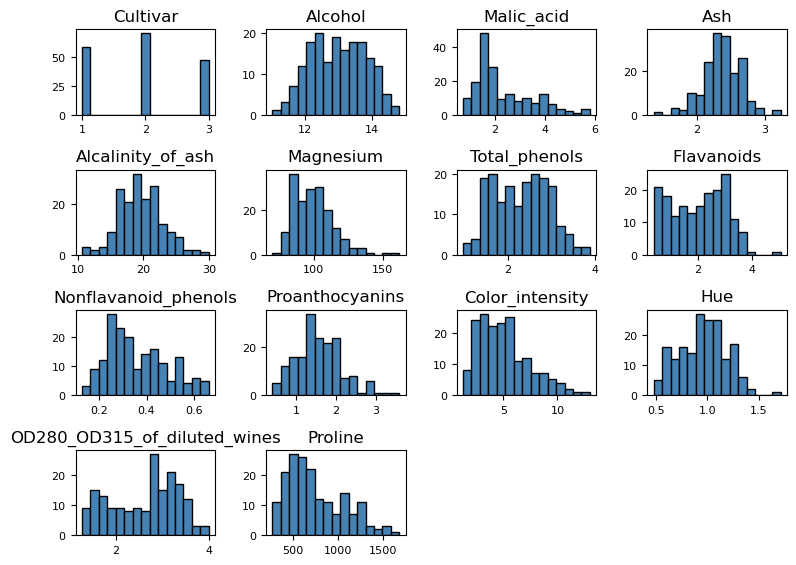

In [7]:
df.hist(bins=15, color="steelblue", edgecolor="black", xlabelsize=8,
        ylabelsize=8, grid=False    )
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

1. Cultivar: This is target to be predicted with 3 distinct classes. The distribution is uneven, with class 2 being the most common, followed by class 1, and class 3 being the least frequent.

2. Alcohol: The distribution is roughly normal, with a slight right skew. The majority of values fall between 12% and 14%, with the peak around 13%.

3. Malic_acid: This shows a right-skewed distribution with a long tail. Most values are concentrated between 0 and 2, with a few outliers extending up to 6.

4. Ash: Another right-skewed distribution, with most values between 1.5 and 3, and a few outliers up to 4.

5. Alcalinity_of_ash: Approximately normal distribution, centered around 20, with a range from about 10 to 30.

6. Magnesium: Right-skewed distribution, with most values between 80 and 120, and a long tail extending to about 160.

7. Total_phenols: Bimodal distribution with peaks around 1 and 2.5, suggesting possibly two distinct groups within the data.

8. Flavanoids: Another bimodal distribution, with peaks at about 1 and 3, again suggesting two distinct groups.

9. Nonflavanoid_phenols: Right-skewed distribution with most values below 0.4 and a long tail extending to about 0.7.

10. Proanthocyanins: Right-skewed distribution with most values between 1 and 2, and a few outliers up to 3.

11. Color_intensity: Strongly right-skewed distribution with a peak around 3-4 and a long tail extending to 10+.

12. Hue: Approximately normal distribution centered around 1, ranging from about 0.5 to 1.5.

13. OD280_OD315_of_diluted_wines: Bimodal distribution with peaks at about 1.7 and 3, suggesting two distinct groups.

14. Proline: Strongly right-skewed distribution with most values below 1000 and a long tail extending to 1500+.

Key deductions:

1. The presence of bimodal distributions in several variables (Total_phenols, Flavanoids, OD280_OD315_of_diluted_wines) suggests there might be distinct subgroups within the dataset, possibly corresponding to different types or qualities of wine.

2. Many variables show right-skewed distributions, which is common in natural and biological processes. This suggests that while most wines have moderate levels of these compounds, a few have exceptionally high levels.

3. The Alcohol content is fairly normally distributed, indicating a consistent range for most wines in the dataset.

4. The Cultivar variable suggests we're dealing with three types of wine, with unequal representation in the dataset.

5. Some variables like Malic_acid and Proline have extreme right skews and potential outliers, which may require special handling in further analyses (e.g., log transformation or outlier treatment).

6. The bimodal and skewed distributions suggest that simple summary statistics like mean and standard deviation may not adequately describe these variables. Median and interquartile range might be more appropriate in some cases.

7. For any modeling tasks, the non-normal distributions of many variables might violate assumptions of certain statistical methods, necessitating careful choice of analytical techniques or data transformations.

The above diagram depicts the various distributions of the numeric columns. Let us drill down to some of the numeric columns and explore them further. We can't explore all the features but we will try and explore as much as we can. Remember the essence of this process is to find the underlying structure as well as any issues with the dataset before modelling. We start with a univariate analysis of Magnesium.

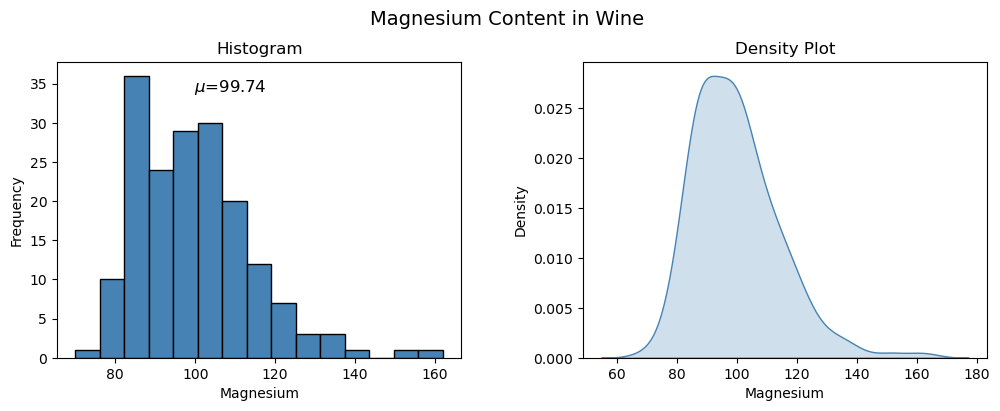

In [8]:
# Creating a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Adjusting layout and adding a super title
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle("Magnesium Content in Wine", fontsize=14)

# Plotting the Histogram
ax1.set_title("Histogram")
ax1.set_xlabel("Magnesium")
ax1.set_ylabel("Frequency")
ax1.hist(df["Magnesium"], color="steelblue", bins=15, edgecolor="black", linewidth=1)
ax1.text(df["Magnesium"].mean(), max(ax1.get_ylim()) * 0.9, r'$\mu$=' + str(round(df["Magnesium"].mean(), 2)), fontsize=12)

# Plotting the Density Plot
ax2.set_title("Density Plot")
ax2.set_xlabel("Magnesium")
ax2.set_ylabel("Density")
sns.kdeplot(df["Magnesium"], ax=ax2, shade=True, color="steelblue")

# Display the plots
plt.show()


1. Distribution Shape:
   - The histogram and density plot both show a right-skewed (positively skewed) distribution.
   - There's a clear peak around 90-100 mg/L, with a long tail extending to the right.

2. Central Tendency:
   - The mean (μ) is given as 99.74 mg/L.
   - However, due to the right skew, the median is likely lower than the mean.
   - The mode appears to be in the 90-100 mg/L range, which is the most frequent bin in the histogram.

3. Spread:
   - The majority of the data falls between approximately 80 and 120 mg/L.
   - There's a wide range, with values extending from about 70 mg/L to over 160 mg/L.

4. Skewness:
   - The distribution is moderately to strongly right-skewed.
   - This indicates that while most wines have magnesium content clustered around 80-110 mg/L, there are some wines with much higher magnesium levels.

5. Outliers:
   - There appear to be potential outliers on the high end, with a few wines having magnesium content above 140 mg/L.
   - These outliers contribute to the long right tail of the distribution.

6. Data Range:
   - The range appears to be approximately 70 to 170 mg/L.

7. Density Plot Characteristics:
   - The density plot smooths out the data, clearly showing the right-skewed nature of the distribution.
   - It highlights the peak around 90-100 mg/L and the gradual tapering off towards higher values.

8. Implications:
   - The right-skewed nature suggests that using the mean alone might overestimate the typical magnesium content in these wines.
   - For descriptive statistics, median and interquartile range might be more appropriate measures than mean and standard deviation.
   - Any statistical analyses assuming normality would not be appropriate without transformation.

9. Potential Factors:
   - The skewed distribution might reflect natural variations in grape composition, soil conditions, or winemaking processes.
   - The outliers with high magnesium content could represent specific wine varieties or production methods that result in higher mineral content.

In conclusion, the magnesium content in these wines shows a right-skewed distribution with a mean of 99.74 mg/L. While most wines cluster around 80-110 mg/L, there's considerable variation, with some wines having much higher magnesium levels.

Let us also try and visualize the Cultivar column using a bar plot.

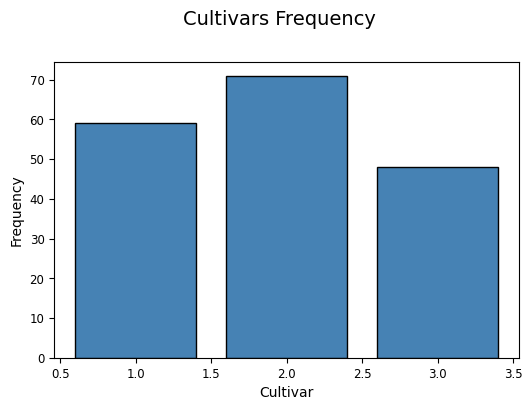

In [9]:
# Bar Plot
fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Cultivars Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Cultivar")
ax.set_ylabel("Frequency")
wc = df["Cultivar"].value_counts()
wc = (list(wc.index), list(wc.values))
ax.tick_params(axis="both", which="major", labelsize=8.5)
bar = ax.bar(wc[0], wc[1], color="steelblue",
             edgecolor="black", linewidth=1)

Class 2 appears to be the one with the most instances followed by Class 1 and Class 3 has the least instances in the dataset. Usually it is expected that all the target classes are equally represented but real world datasets most of the time are imbalanced. There are various proposed approaches for handling imbalanced classes in dataset such oversmapling the minority class or undersampling the majority class or even using other machine learning models like smote analysis to balance the classes. Each of the approaches come with their pros and cons.

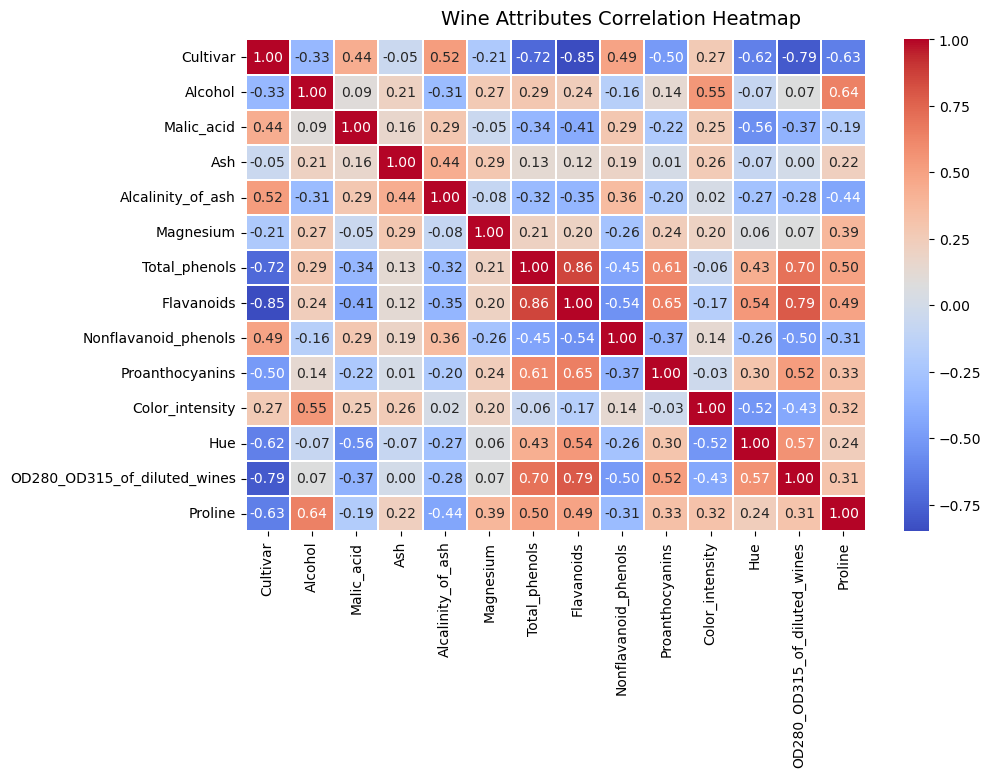

In [10]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt=".2f",
                 linewidth=0.05)
f.subplots_adjust(top=0.93)
t= f.suptitle("Wine Attributes Correlation Heatmap", fontsize=14)

Focusing on the relationships between the features and the target variable "Cultivar":

1. Strong Negative Correlations with Cultivar:
   - Flavanoids (-0.85): This is the strongest negative correlation, indicating that as the cultivar number increases, the flavanoid content tends to decrease significantly.
   - OD280_OD315_of_diluted_wines (-0.79): Also known as the wine's color density, this has a strong negative correlation with cultivar.
   - Total_phenols (-0.72): Shows a strong negative correlation, suggesting that higher cultivar numbers are associated with lower total phenol content.

2. Moderate Negative Correlations with Cultivar:
   - Proline (-0.63): Indicates that proline content tends to decrease as the cultivar number increases.
   - Hue (-0.62): Suggests that wines with higher cultivar numbers tend to have lower hue values.
   - Proanthocyanins (-0.50): Shows a moderate negative relationship with cultivar.

3. Moderate Positive Correlations with Cultivar:
   - Alcalinity_of_ash (0.52): Indicates that wines with higher cultivar numbers tend to have higher ash alkalinity.
   - Malic_acid (0.44): Suggests a moderate positive relationship between malic acid content and cultivar number.

4. Weak to Moderate Correlations with Cultivar:
   - Nonflavanoid_phenols (0.49): Shows a weak to moderate positive correlation.
   - Alcohol (-0.33): Indicates a weak negative correlation with cultivar.
   - Color_intensity (0.27): Suggests a weak positive correlation.

5. Negligible Correlations with Cultivar:
   - Ash (-0.05): Shows almost no correlation with cultivar.
   - Magnesium (-0.21): Indicates a very weak negative correlation.

Key Insights:
1. The strongest predictors of cultivar appear to be flavanoids, color density (OD280_OD315), and total phenols, all negatively correlated.
2. Chemical compounds related to wine color and taste (flavanoids, phenols, hue) seem to be important in distinguishing between cultivars.
3. Proline, an amino acid, also shows a strong relationship with cultivar, potentially indicating differences in grape protein content across cultivars.
4. Alcalinity of ash and malic acid content show moderate positive correlations, suggesting they increase with cultivar number.
5. Some traditional wine characteristics like alcohol content and color intensity have weaker correlations with cultivar than might be expected.

Implications for Analysis:
1. Features like flavanoids, color density, total phenols, and proline could be key in developing models to predict or classify wine cultivars.
2. The strong correlations suggest that multicollinearity might be an issue in predictive modeling, requiring careful feature selection or dimensionality reduction techniques.
3. The varying strengths of correlations indicate that a combination of features, rather than any single attribute, would likely be necessary for accurate cultivar classification.
4. The presence of both positive and negative correlations suggests that the cultivars have distinct chemical profiles, which could be useful for authentication or quality control purposes.

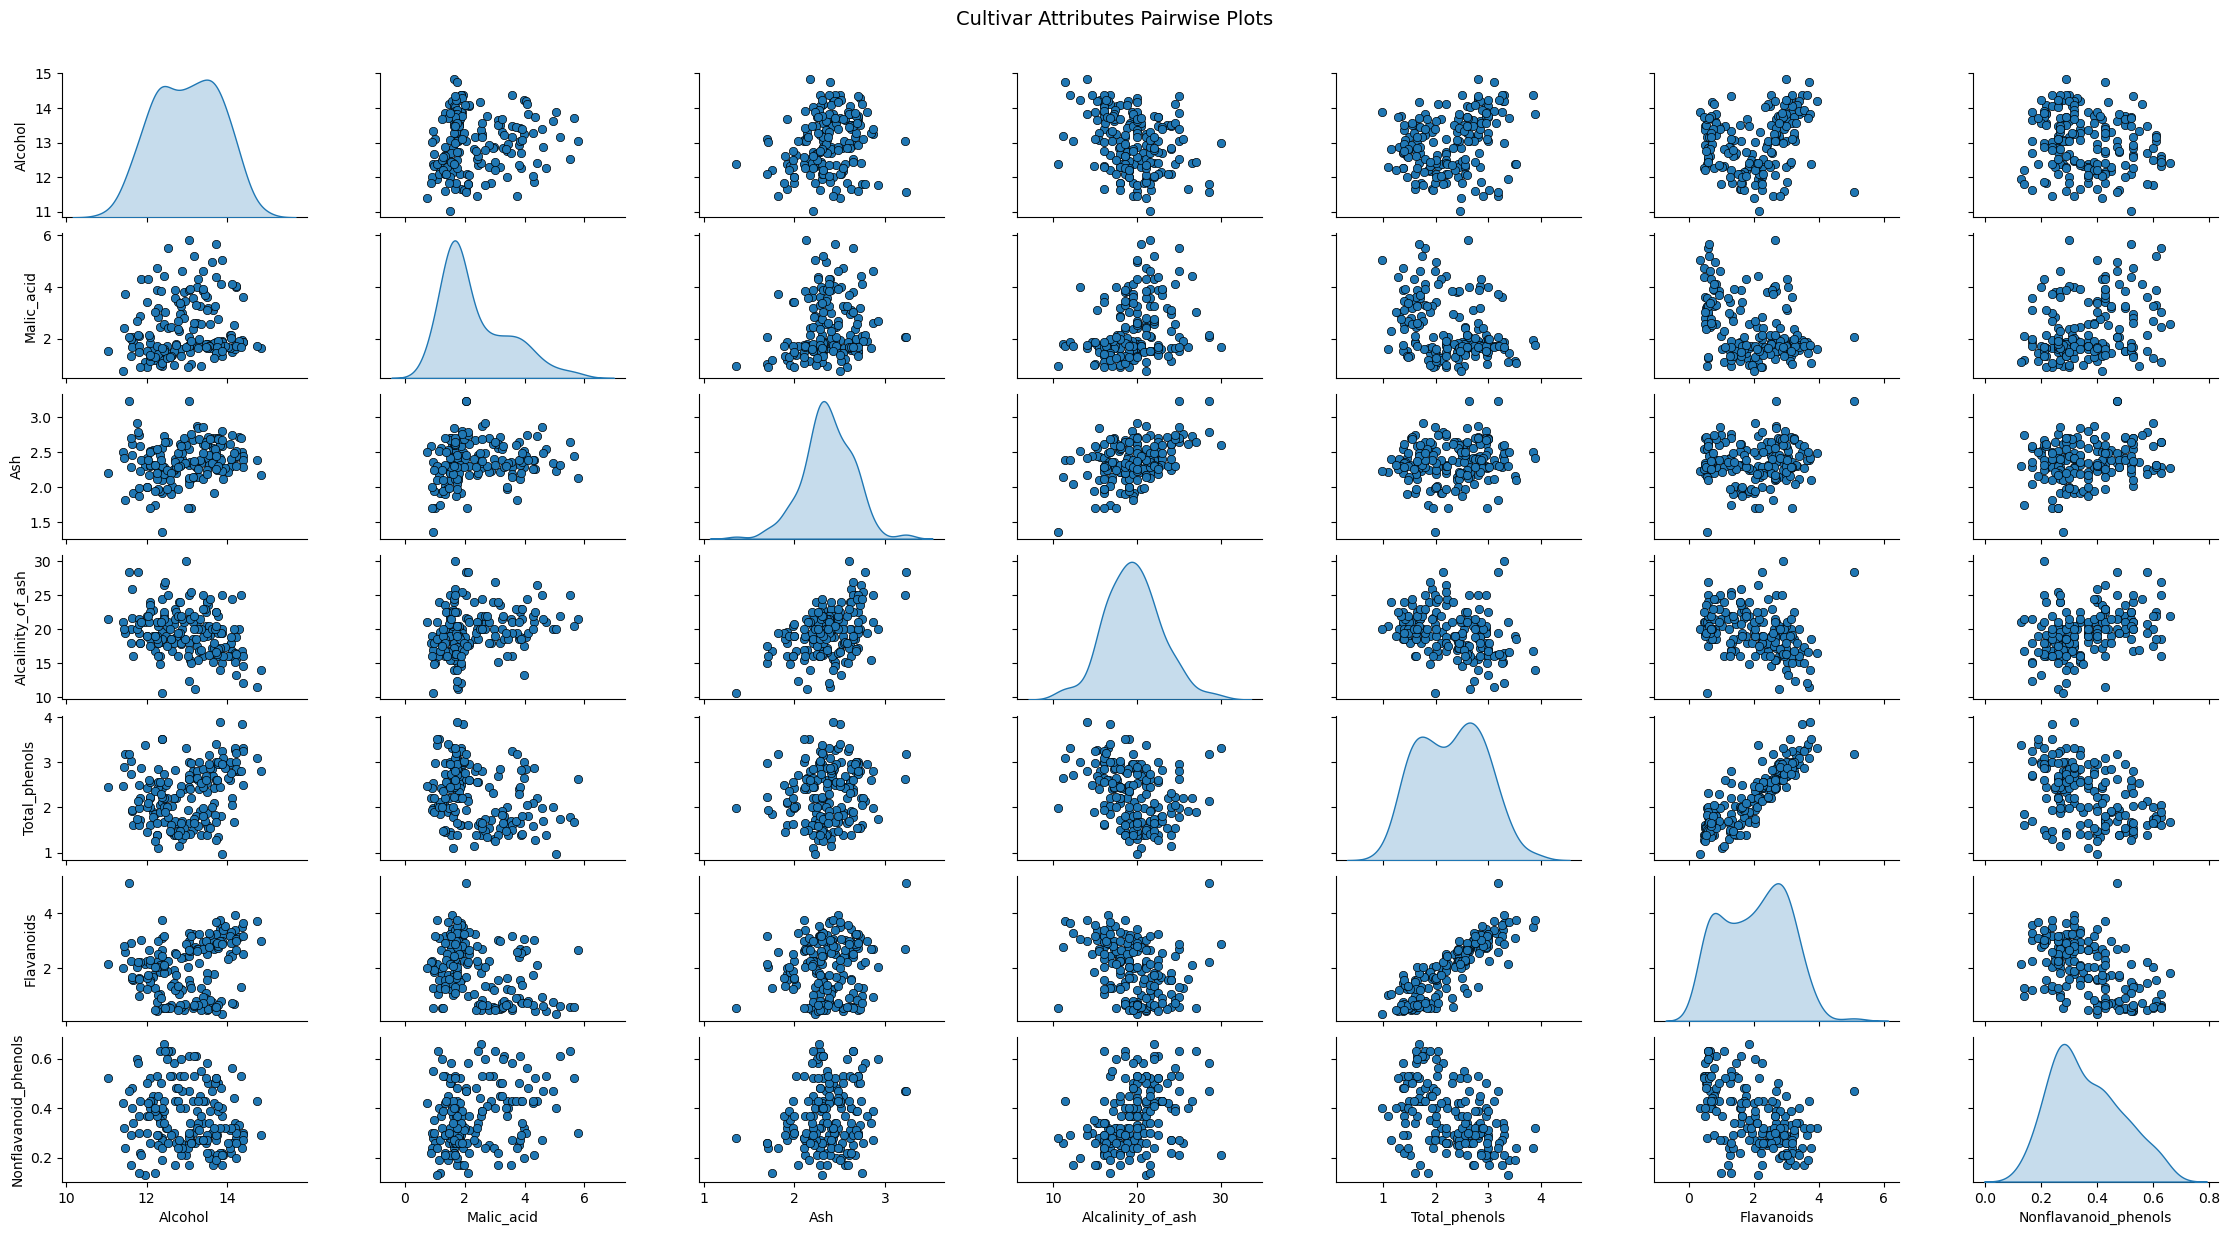

In [11]:
# Pair-wise Scatter Plots
cols = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle("Cultivar Attributes Pairwise Plots", fontsize=14)

This pairwise plot matrix provides valuable insights into the relationships between different wine attributes. Let's analyze the key observations:

1. Alcohol:
   - Distribution is roughly normal with a slight right skew.
   - Shows a moderate negative correlation with malic acid.
   - Positive correlation with flavanoids and total phenols.

2. Malic acid:
   - Highly right-skewed distribution.
   - Negative correlation with alcohol and flavanoids.
   - Positive correlation with ash and alcalinity of ash.

3. Ash:
   - Roughly normal distribution.
   - Positive correlation with alcalinity of ash.
   - Weak correlations with most other variables.

4. Alcalinity of ash:
   - Normal distribution.
   - Positive correlation with ash and malic acid.
   - Negative correlation with flavanoids and total phenols.

5. Total phenols:
   - Bimodal distribution, suggesting two distinct groups of wines.
   - Strong positive correlation with flavanoids.
   - Negative correlation with nonflavanoid phenols.

6. Flavanoids:
   - Bimodal distribution, aligning with total phenols.
   - Strong positive correlation with total phenols.
   - Negative correlation with malic acid and nonflavanoid phenols.

7. Nonflavanoid phenols:
   - Right-skewed distribution.
   - Negative correlation with flavanoids and total phenols.
   - Weak correlations with most other variables.

Key Insights:

1. Cluster Patterns:
   - Several plots (e.g., flavanoids vs. total phenols, flavanoids vs. alcohol) show distinct clustering, suggesting potential subgroups within the wine dataset. This could indicate different wine varieties or quality levels.

2. Multicollinearity:
   - Strong correlations between some variables (e.g., flavanoids and total phenols) suggest multicollinearity, which could impact certain statistical analyses or machine learning models.

3. Feature Importance:
   - Flavanoids and total phenols show strong relationships with several other variables, indicating they might be key features for distinguishing between wine types or qualities.

4. Distribution Shapes:
   - The presence of bimodal distributions (total phenols, flavanoids) and skewed distributions (malic acid, nonflavanoid phenols) suggests that non-parametric statistical methods or data transformations might be necessary for some analyses.

5. Outliers:
   - Several plots show potential outliers, particularly in malic acid and nonflavanoid phenols. These outliers might represent unique wine samples or measurement errors.

6. Complex Relationships:
   - Some variable pairs show non-linear relationships (e.g., alcohol vs. malic acid), indicating that simple linear models might not capture all the complexity in the data.

7. Grouping Potential:
   - The clear separation in some plots (like flavanoids vs. total phenols) suggests that these features could be effective in clustering or classification tasks.

Implications for Analysis:

1. Feature Selection: Flavanoids and total phenols appear to be strong candidates for feature selection in predictive modeling due to their distinct patterns and correlations.

2. Data Preprocessing: Consider log transformations for right-skewed variables like malic acid to normalize their distributions.

3. Outlier Treatment: Investigate and potentially treat outliers, especially in malic acid and nonflavanoid phenols.

4. Clustering Analysis: The presence of distinct clusters suggests that unsupervised learning techniques like K-means clustering might reveal interesting patterns in the data.

5. Non-linear Modeling: Consider non-linear models or techniques that can capture complex relationships between variables.

6. Dimensionality Reduction: Given the high correlations between some variables, techniques like Principal Component Analysis (PCA) might be useful to reduce dimensionality while retaining important information.

7. Subgroup Analysis: Investigate the reasons behind the bimodal distributions, as they might represent different wine categories or production methods.

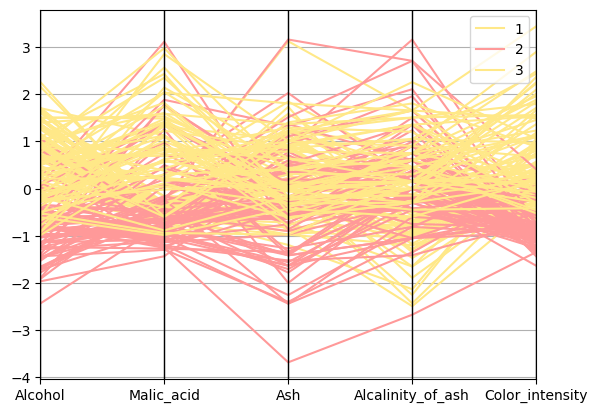

In [28]:
# Scaling the features to avoid outliers
cols = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
 'Color_intensity']
subset_df = df[cols]

ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, df["Cultivar"]], axis=1)

# Plotting parallel coordinates
from pandas.plotting import parallel_coordinates

pc = parallel_coordinates(final_df, "Cultivar", color=("#FFE888", "#FF9999"))

The parallel coordinates plot of the wine dataset reveals distinct patterns among the three cultivars based on their chemical properties. Cultivar 1, represented in yellow, shows a wider range of values, particularly in `Malic_acid` and `Color_intensity`, indicating greater variability within this group. Cultivar 2, in red, exhibits more clustered values, suggesting that these wines have more consistent chemical profiles, particularly lower values for `Malic_acid` and `Color_intensity`. Cultivar 3, in pink, falls between cultivars 1 and 2, showing moderate spread and intermediate values across the features. Notable feature correlations and variations are evident, such as the positive correlation between `Alcohol` and `Color_intensity` and the negative correlation between `Ash` and `Alcalinity_of_ash`. Overall, the plot effectively differentiates the cultivars, highlighting that specific chemical properties can be key indicators for classifying wine types.

Text(0, 0.5, 'Wine Alcohol %')

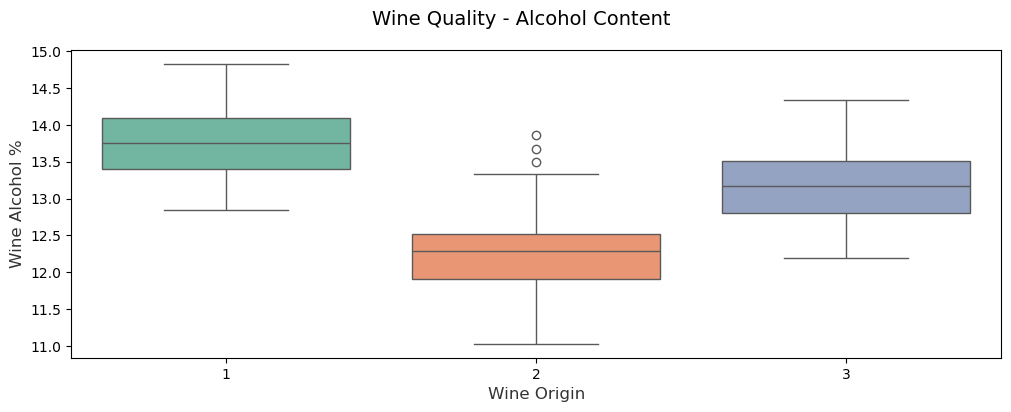

In [13]:
#  Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="Cultivar", y="Alcohol", data=df,  ax=ax, palette="Set2")
ax.set_xlabel("Wine Origin",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

1. Overall Distribution:
   - The plot shows three distinct origins of wine, labeled as 1, 2, and 3.
   - Alcohol content ranges from about 11% to 15% across all origins.

2. Origin 1:
   - Highest median alcohol content (around 13.8%)
   - Relatively narrow interquartile range (IQR)
   - Some outliers on the lower end
   - Range: approximately 12.8% to 14.8%

3. Origin 2:
   - Lowest median alcohol content (about 12.3%)
   - Widest spread of data (largest box)
   - Several outliers on the upper end
   - Range: approximately 11% to 13.5%, with outliers up to about 14%

4. Origin 3:
   - Median alcohol content between Origin 1 and 2 (around 13.2%)
   - Moderate spread, smaller than Origin 2 but larger than Origin 1
   - No visible outliers
   - Range: approximately 12.2% to 14.4%

Key Observations:

1. Regional Differences:
   - There are clear differences in alcohol content among wines from different origins.
   - Origin 1 wines have consistently higher alcohol content.
   - Origin 2 wines have the lowest alcohol content but the most variability.

2. Variability:
   - Origin 2 shows the most variability in alcohol content, suggesting diverse winemaking practices or grape varieties in this region.
   - Origin 1 shows the least variability, indicating more consistent winemaking practices or growing conditions.

3. Overlap:
   - There's significant overlap in alcohol content across all three origins, especially between Origin 1 and 3.

4. Outliers:
   - Origin 2 has notable outliers with higher alcohol content, potentially similar to typical Origin 1 wines.

Implications and Insights:

1. Terroir and Winemaking Practices:
   - The differences in alcohol content likely reflect variations in terroir (climate, soil, topography) and local winemaking traditions among the three origins.

2. Grape Varieties:
   - The variations might also indicate different predominant grape varieties used in each region, as some varieties naturally produce higher sugar levels leading to higher alcohol content.

3. Climate Influence:
   - Origin 1's higher alcohol content could suggest a warmer climate, leading to riper grapes with higher sugar content.
   - Origin 2's lower alcohol content might indicate a cooler climate or earlier harvesting practices.

4. Stylistic Differences:
   - These variations could represent distinctive regional styles, with Origin 1 perhaps known for fuller-bodied wines and Origin 2 for lighter styles.

5. Marketing and Labeling:
   - This data could inform marketing strategies, highlighting the typical characteristics of wines from each origin.

6. Consumer Preferences:
   - Understanding these regional differences can help in matching wines to consumer preferences for different alcohol levels.

7. Classification Potential:
   - While there's overlap, alcohol content could be a useful feature in algorithms attempting to classify wines by origin, especially when combined with other chemical properties.

8. Regulatory Implications:
   - The consistent high alcohol content in Origin 1 wines might have implications for labeling and taxation, as some regions have regulations based on alcohol levels.

In conclusion, this analysis reveals distinct patterns in alcohol content among wines from three different origins. These differences likely reflect a combination of environmental factors, grape varieties, and regional winemaking practices. This information is valuable for understanding regional wine characteristics, informing production and marketing strategies, and potentially aiding in the classification or authentication of wines based on their origin.

## Key Findings

1. The analysis above includes exploratory data analysis and visualization techniques to gain insights into the wine dataset. It involves the use of various Python libraries such as pandas, matplotlib, seaborn, and scikit-learn.

2. The dataset contains information about different wine attributes such as alcohol content, malic acid, ash, color intensity, and more. These attributes are used to analyze the relationships between variables, identify patterns, and understand the characteristics of different wine cultivars.

3. Visualizations such as bar plots, pair-wise scatter plots, parallel coordinates plots, box plots, and density plots are used to visualize the data and reveal patterns, correlations, and distributions among the wine attributes.

4. The analysis also includes statistical measures such as correlation matrices, summary statistics, and scaling of features to provide a comprehensive understanding of the dataset. These measures help in identifying important features, detecting outliers, and assessing the variability and distribution of the data.

5. The analysis highlights key insights such as the relationships between wine attributes, the impact of different cultivars on alcohol content, the presence of distinct clusters or subgroups within the dataset, and the potential for feature selection and classification based on the wine attributes.

6. The findings from this analysis can be used to inform decision-making in the wine industry, such as understanding regional wine characteristics, optimizing winemaking practices, identifying grape varieties, predicting wine quality, and supporting marketing strategies based on consumer preferences.

## Feature Extraction


Feature extraction is the process of selecting a subset of relevant features for use in model construction. It is important because it helps to reduce the dimensionality of the dataset, which in turn reduces the computational cost of the model and helps to avoid overfitting.

In [14]:
# Splitting the data into features and target
X = df.drop(columns=["Cultivar"])
y = df["Cultivar"]

In [15]:

# Instantiating the model. We will use the default parameters
rf = RandomForestClassifier(random_state=42)

# Fitting the model
rf.fit(X, y)

RandomForestClassifier(random_state=42)

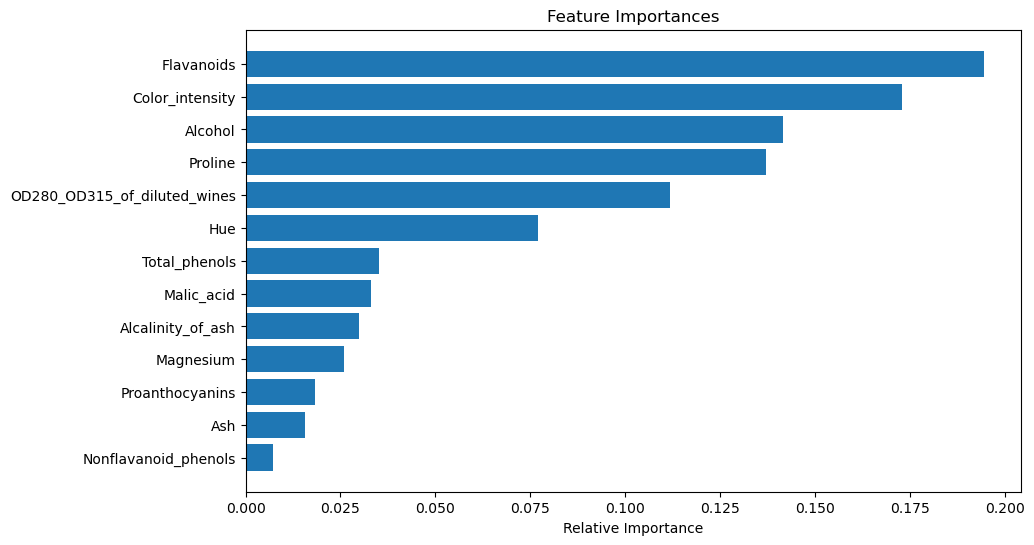

In [23]:
# Getting the feature importances
importances= rf.feature_importances_
indices = np.argsort(importances)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This diagram shows the relative importance of various features in determining the origin of wines, likely derived from a machine learning model such as Random Forest or Gradient Boosting. Let's break down the key points:

1. Feature Ranking:
   The features are ranked from most important (top) to least important (bottom) based on their relative importance scores.

2. Top Features:
   - Flavanoids: By far the most important feature, with a relative importance of about 0.19 (19%)
   - Color_intensity: Second most important, with importance around 0.17 (17%)
   - Alcohol: Third most important, scoring about 0.15 (15%)

3. Mid-range Features:
   - Proline: Fourth most important
   - OD280_OD315_of_diluted_wines: Fifth most important
   - Hue: Sixth most important

4. Less Important Features:
   Features from Total_phenols down to Nonflavanoid_phenols have relatively low importance scores, with Nonflavanoid_phenols being the least important.

5. Importance Distribution:
   There's a clear gap in importance between the top 6 features and the rest, suggesting these are the key differentiators for wine origin.

Key Insights:

1. Chemical Composition: The top features (Flavanoids, Color_intensity, Alcohol) are all related to the chemical composition of the wine, which strongly influences its sensory properties.

2. Visual and Sensory Aspects: Color_intensity and Hue being important suggests that visual aspects of the wine are good indicators of its origin.

3. Fermentation Process: Alcohol content being a top feature indicates that fermentation practices, which can vary by region, play a significant role in distinguishing wine origins.

4. Amino Acid Content: Proline, an amino acid, is quite important, which could relate to the grape varieties used or growing conditions in different regions.

5. Spectral Data: The importance of OD280_OD315_of_diluted_wines (likely a spectrophotometric measurement) suggests that advanced analytical techniques are useful in origin determination.

6. Minor Factors: While all features contribute, some (like Ash and Nonflavanoid_phenols) play a much smaller role in determining origin.

Implications:

1. For Classification: A model using just the top 5-6 features might perform nearly as well as one using all features, potentially allowing for more efficient origin classification.

2. For Winemakers: This data highlights which aspects of wine are most distinctive of its origin, which could be useful for maintaining regional characteristics or for creating wines that mimic certain origins.

3. For Researchers: This suggests areas of focus for further study in understanding regional differences in wine production.

4. For Quality Control: These features could be key in verifying the claimed origin of wines, potentially useful in detecting fraud or mislabeling.

5. For Consumers: Understanding these key differentiators could help enthusiasts better appreciate the unique characteristics of wines from different origins.

This analysis provides valuable insights into which chemical and sensory properties are most closely tied to a wine's origin, reflecting the combined effects of terroir, grape varieties, and regional winemaking practices.

## Feature Scaling

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

## Model Building

Before model building it is a good practice to set aside a portion of the dataset for model evaluation and testing. The reason for that is, the model may perform very well on the training data but may generalise poorly on unseen data or may overfit the training data but generalize poorly on the unseen data.

In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Instantiating the baseline model
# with its default parameters
lr = LogisticRegression(random_state=42)

# Fitting the model
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [30]:
# Making predictions or inference
y_pred = lr.predict(X_test)

In [37]:
# Evaluating the model
print("Baseline Model: Logistic Regression")
print("Accuracy on the test dataset:", round((accuracy_score(y_test, y_pred)), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Baseline Model: Logistic Regression
Accuracy on the test dataset: 0.97

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



The baseline performed well on the reserved dataset by achieving an accuracy of 97% which is actually remarkable for the first attempt using the default parameters of the Logistic Regression model.
The classification report confirms the strong performance. Origins 1 and 3 have perfect precision (1.00), while Origin 2 is slightly lower (0.93) due to the single misclassification. Recall is perfect (1.00) for Origins 1 and 2, with Origin 3 slightly lower (0.90). F1-scores are consequently high across all classes (1.00, 0.97, 0.95). The overall accuracy is 0.97, indicating that 97% of all predictions were correct. Both macro and weighted averages of precision, recall, and F1-score are 0.97 or 0.98, reflecting consistent high performance across all classes.

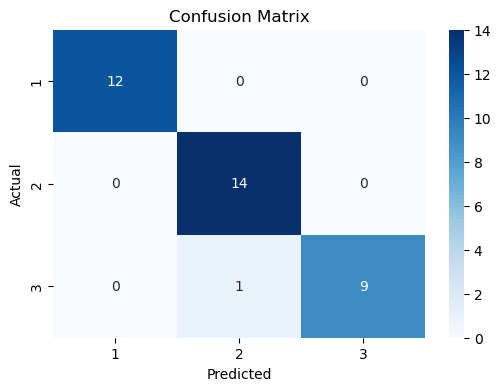

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows excellent classification performance across the three wine origins. Origin 1 and 2 are perfectly classified, with 12 and 14 correct predictions respectively. Origin 3 has 9 correct predictions, with only 1 misclassification as Origin 2. This indicates high accuracy, with the model struggling slightly only in distinguishing Origin 3 from Origin 2 in one case.

## Cross Validation

Cross-validation is a technique used to evaluate the performance of a machine learning model and ensure its generalizability to an independent dataset. It involves partitioning the data into subsets, training the model on some subsets, and validating it on the remaining subsets. Here’s a step-by-step explanation:

1. Split the Data: The dataset is divided into k subsets (folds). Common values for k are 5 or 10.
2. Train and Validate: The model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, each time with a different fold as the validation set.
3. Average the Results: The performance metric (e.g., accuracy, precision, recall) is averaged over the k iterations to provide a more robust estimate of the model's performance.

*Benefits of Cross-Validation*
- Reduces Overfitting: By training and validating on different subsets, it provides a better estimate of model performance on unseen data.
- More Reliable Performance Metrics: Averaging the results over multiple folds gives a more reliable estimate of the model's performance.

*Types of Cross-Validation*
- k-Fold Cross-Validation: The most common type, as described above.
- Stratified k-Fold Cross-Validation: Ensures that each fold has a similar distribution of the target variable.
- Leave-One-Out Cross-Validation (LOOCV): A special case where k is equal to the number of data points, meaning each fold contains exactly one data point.

We will leverage on this technique as well to evaluate our baseline model.

In [40]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", round(cv_scores.mean(),2))

Cross-validation scores: [1.         0.96551724 1.         1.         1.        ]
Average cross-validation score: 0.99


The high scores of the cv results supports the original baseline results that the model performs excellently well on the training data and moreover there is consistency in the scores across the folds, indicating that the model's performance is stable and not highly variable.

## Building Other Models to challenge the baseline model

In [49]:
# Instantiating the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Making predictions or inference and evaluating the decision tree model
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 2))

Decision Tree Accuracy: 0.94


The Decision Tree model's accuracy is 94% which is good but not as good as the baseline model which had an accuracy of 97%. This is possible because sometimes a model may struggle to capture the underlying patterns of the dataset very well

In [51]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Making predictions or inference and evaluating the random forest model
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))

Random Forest Accuracy: 1.0


The Random Forest model achieved an overall excellent accuracy score of 100%, meaning it is able to classify all the data(test) into their various origins accurately. This is better than the baseline model which had an accuracy score of 97%.

In [53]:
# Instantiating the Support Vector Machine model
svm = SVC(random_state=42)

# Fit the model
svm.fit(X_train, y_train)

SVC(random_state=42)

In [54]:
# Making predictions or inference and evaluating the SVM model
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm), 2))

SVM Accuracy: 0.97


The Support Vector Machine model achieved an accuracy score of 97% which is the same as the baseline model.

In [55]:
# Instantiating the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Fitting the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [56]:
# Making predictions or inference and evaluating the Gradient Boosting model
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 2))

Gradient Boosting Accuracy: 0.94


The Gradient Boosting model achieved an accuracy of 94% as compared to the baseline model which had an accuracy of 97%.

## Evaluation and Comparison of Models

In [64]:
# Step 8: Evaluation and Comparison of Models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_gb)
]

performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
performance_df.sort_values(by='Accuracy', ascending=False, inplace=True)
performance_df.reset_index(drop=True, inplace=True)
performance_df["Accuracy"] = round(performance_df["Accuracy"],2)
performance_df

,Model,Accuracy
0,Random Forest,1.00
1,Logistic Regression,0.97
2,SVM,0.97
3,Decision Tree,0.94
4,Gradient Boosting,0.94


The results on the test set show that the Random Forest model achieved a perfect accuracy of 100%, suggesting it captured the patterns in the data well, though it may indicate potential overfitting. Logistic Regression and SVM both performed strongly with an accuracy of 97%, demonstrating their effectiveness in modeling the data, possibly due to capturing key linear or non-linear relationships. The Decision Tree and Gradient Boosting models both had an accuracy of 94%, showing good performance but slightly lower than the other models, likely due to their relative simplicity or different learning approaches. Despite the high accuracy across all models, the Random Forest's perfect score could be a sign of overfitting, which may reduce its generalizability to new data. Logistic Regression and SVM's strong, near-identical performance suggests they are robust and generalize well. The Gradient Boosting and Decision Tree models performed well but may require more tuning to improve their predictive power.

## Saving the Baseline and Ohter Challenge Models

It is a good practice to save the models built so that they can be used to make inference in the future in a web application or even be used again. This help save the boilerplate task of having to train the models again from scratch any time we want to make inferences as well as comparing models to evaluate which is better. There are various libraries and packages(e.g pickle, joblib, h5py for Keras models, torch.save for pytorch models or onnx for interoperability between deep learning models) availbale that we can leverage on for this task. In particular to our task, we will be using joblib to save our models.

In [67]:
import joblib

# Save the logistic regression model
joblib.dump(lr, "../models/wine_logistic_regression.joblib")

# Save the decision tree model
joblib.dump(dt, "../models/wine_decision_tree.joblib")

# Save the random forest model
joblib.dump(rf, "../models/wine_random_forest.joblib")

# Save the SVM model
joblib.dump(svm, "../models/wine_svm.joblib")

# Save the gradient boosting model
joblib.dump(gb, "../models/wine_gradient_boosting.joblib")


['../models/wine_gradient_boosting.joblib']